In [1]:
# InternalError: GPU sync failed
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
print("predict the forest cover type")

predict the forest cover type


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
import numpy as np
import os
%matplotlib inline

Using TensorFlow backend.


In [4]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

In [5]:
df = pd.read_csv("train.csv.zip", index_col=0)

In [6]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [7]:
print("Q1: What columns are present in the dataframe?")

Q1: What columns are present in the dataframe?


In [8]:
# a lot of columns are present
print("Q1: answer")
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [9]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [10]:
plt.rcParams['figure.figsize'] = [30, 15]
# for testing, but too much for the pc
#df.hist()

In [11]:
print("Q2: What is the distribution of the dependent variable?")

Q2: What is the distribution of the dependent variable?


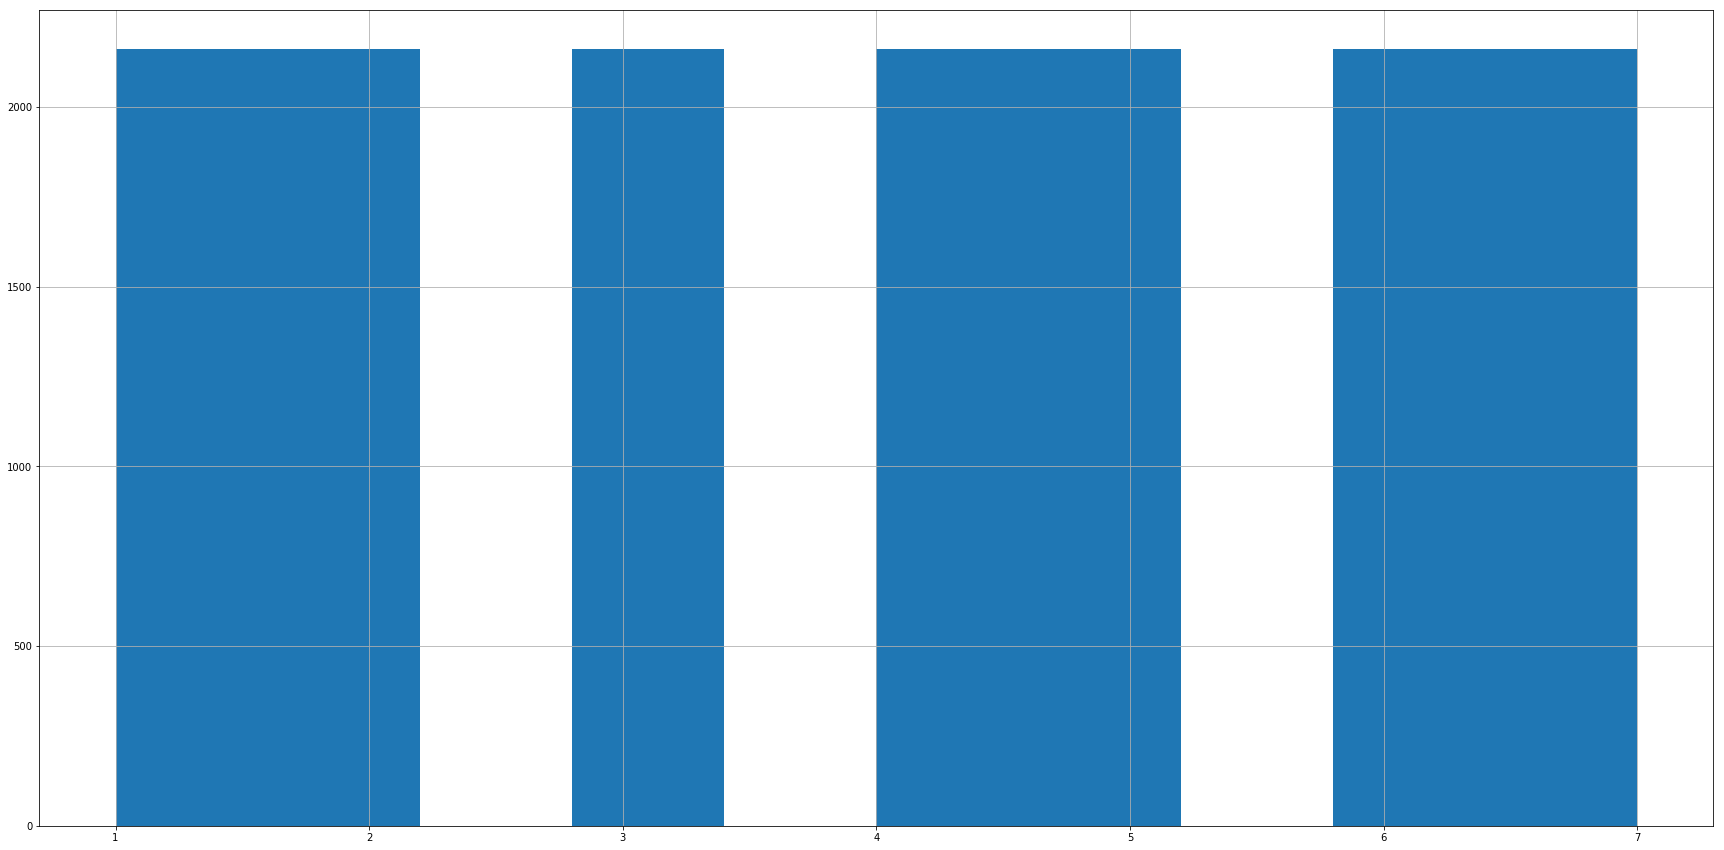

In [12]:
df_cover = df['Cover_Type']
df_cover.hist(bins=10)

In [13]:
print("Distribution is uniform...")

Distribution is uniform...


In [14]:
def load_data():
    df = pd.read_csv("train.csv.zip", index_col=0)
    y = df.Cover_Type
    print(y[0:5])
    y = to_categorical(y)
    print(y[0:5])
    X = df.drop(["Cover_Type"], axis=1)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.8)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.8)
    return X_train, X_val, X_test, y_train, y_val, y_test, scaler

In [15]:
print("Q3: In the above code, what purpose does to_categorical serve?")
print("to_categorical takes the dependent variable and converts it to a one-hot encoded binary vector. In smaller words, makes it looks like bad assembly code. The reason for this is maths, one-hot encoding allows the multiple classification problem to expression in a network. Example: we couldn't use soft max on dtype.object, or categorical_crossentropy loss couldn't be calculated")

Q3: In the above code, what purpose does to_categorical serve?
to_categorical takes the dependent variable and converts it to a one-hot encoded binary vector. In smaller words, makes it looks like bad assembly code. The reason for this is maths, one-hot encoding allows the multiple classification problem to expression in a network. Example: we couldn't use soft max on dtype.object, or categorical_crossentropy loss couldn't be calculated


In [16]:
def create_callbacks():
    tensorboard_callback = TensorBoard(log_dir=os.path.join(os.getcwd(), "tb_log", "5h_adam_20epochs"), histogram_freq=1, batch_size=32,
                                       write_graph=True, write_grads=False)

    #checkpoint_callback = ModelCheckpoint(filepath="./model-weights.{epoch:02d}-{val_acc:.6f}.hdf5", monitor='val_acc',
     #                                     verbose=1, save_best_only=True)

    return [tensorboard_callback] #, checkpoint_callback]

In [31]:
#note i have no idea what gloroot_uniform is.. at all 
def build_network(input_features=None, keep_prob=0.1,optimizer='adam', init_mode='gloroot_uniform'):
    inputs = Input(shape=(input_features,), name="input")
    #implement the code to create a keras MLP here.  
    # remember your output layer will need to use softmax activation
    x = Dense(256, activation='relu', kernel_initializer=init_mode, name='hidden1')(inputs)   
    x = Dropout(keep_prob)(x)
    x = Dense(128, activation='relu', kernel_initializer=init_mode, name='hidden2')(x)  
    x = Dropout(keep_prob)(x)
    x = Dense(64, activation='relu', kernel_initializer=init_mode, name='hidden3')(x)    
    x = Dropout(keep_prob)(x)
    x = Dense(32, activation='relu', kernel_initializer=init_mode, name='hidden4')(x)    
    x = Dropout(keep_prob)(x)   
    prediction = Dense(8, activation='softmax', name='output')(x)
    
    model = Model(inputs=inputs, outputs=prediction)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=["accuracy"])
    return model

In [18]:
def build_network2(keep_prob=0.5,optimizer='adam', init_mode='uniform'):
    inputs = Input(shape=(54,), name="input")
    #implement the code to create a keras MLP here.  
    # remember your output layer will need to use softmax activation
    x = Dense(512, activation='relu', kernel_initializer=init_mode, name='hidden1')(inputs)   
    x = Dropout(keep_prob)(x)
    x = Dense(256, activation='relu',kernel_initializer=init_mode, name='hidden2')(x)  
    x = Dropout(keep_prob)(x)
    x = Dense(128, activation='relu',kernel_initializer=init_mode, name='hidden3')(x)    
    x = Dropout(keep_prob)(x)
    x = Dense(64, activation='relu',kernel_initializer=init_mode, name='hidden4')(x)    
    x = Dropout(keep_prob)(x)   
    prediction = Dense(8, activation='softmax', name='output')(x)
    
    #optimizer = Adadelta(lr=learn_rate, decay=decay)
    
    model = Model(inputs=inputs, outputs=prediction)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=["accuracy"])
    return model

In [19]:
X_train, X_val, X_test, y_train, y_val, y_test, scaler = load_data()
#callbacks = create_callbacks()
model = build_network(X_train.shape[1])

Id
1    5
2    5
3    2
4    2
5    5
Name: Cover_Type, dtype: int64
[[0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]]


In [20]:
def create_hyperparameters():
    batches = [5,10,15,20,30,32,50]
    optimizers= ['rmsprop','adam','nadam','adadelta']
    init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
    dropout = np.linspace(0.1,0.5,5)
    return {
        "batch_size": batches,
        "optimizer": optimizers,
        "keep_prob": dropout,
        "init_mode": init_mode
    }

In [21]:
# starting test: baseline 83% accuracy  prec 0.83 recall .084 f1-score 0.84 support 3780

In [22]:
#not sure if this is because i tried to pass a parameter to build_fn
#https://stackoverflow.com/questions/44855603/typeerror-cant-pickle-thread-lock-objects-in-seq2seq
setattr(tf.contrib.rnn.GRUCell, '__deepcopy__', lambda self, _: self)
setattr(tf.contrib.rnn.BasicLSTMCell, '__deepcopy__', lambda self, _: self)
setattr(tf.contrib.rnn.MultiRNNCell, '__deepcopy__', lambda self, _: self)

In [23]:
#wrap model and make capat with scikit-learn api 
model2 = KerasClassifier(build_fn=build_network2, verbose=0)
hyperparameters = create_hyperparameters()

In [28]:

# search through the parameter space of the model, whatever that entails 
# randomly choose values from the param distrb and apply to model, do this 10 times(n_iter) and try combo 3 times, 10*3
search = RandomizedSearchCV(estimator=model2, param_distributions=hyperparameters, n_iter=30, n_jobs=1, cv=3, verbose=1)

In [29]:
search.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 16.1min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000021CD325E860>,
          fit_params=None, iid=True, n_iter=30, n_jobs=1,
          param_distributions={'batch_size': [5, 10, 15, 20, 30, 32, 50], 'optimizer': ['rmsprop', 'adam', 'nadam', 'adadelta'], 'keep_prob': array([0.1, 0.2, 0.3, 0.4, 0.5]), 'init_mode': ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=1)

In [30]:
#best parameters
# {'optimizer': 'adadelta', 'keep_prob': 0.1, 'batch_size': 10}
# {'optimizer': 'adadelta', 'keep_prob': 0.1, 'batch_size': 20}
# {'optimizer': 'adam', 'keep_prob': 0.1, 'init_mode': 'glorot_uniform', 'batch_size': 20}
print(search.best_params_)

{'optimizer': 'adam', 'keep_prob': 0.1, 'init_mode': 'glorot_uniform', 'batch_size': 20}


In [ ]:
print("stop!!!!!!!!! update build network params above and re-try!")

In [32]:
model.fit(x=X_train, y=y_train,
          batch_size=20,
          epochs=300,
          validation_data=(X_val, y_val),
          #callbacks = callbacks,
          verbose=2)

Train on 3024 samples, validate on 2419 samples
Epoch 1/300
 - 14s - loss: 1.2444 - acc: 0.5083 - val_loss: 1.0265 - val_acc: 0.5887
Epoch 2/300
 - 4s - loss: 0.9263 - acc: 0.6138 - val_loss: 0.8397 - val_acc: 0.6474
Epoch 3/300
 - 4s - loss: 0.8502 - acc: 0.6445 - val_loss: 0.8276 - val_acc: 0.6536
Epoch 4/300
 - 4s - loss: 0.7949 - acc: 0.6660 - val_loss: 0.7872 - val_acc: 0.6660
Epoch 5/300
 - 4s - loss: 0.7605 - acc: 0.6845 - val_loss: 0.7756 - val_acc: 0.6689
Epoch 6/300
 - 4s - loss: 0.7300 - acc: 0.6968 - val_loss: 0.7314 - val_acc: 0.6970
Epoch 7/300
 - 4s - loss: 0.7061 - acc: 0.7017 - val_loss: 0.7256 - val_acc: 0.7024
Epoch 8/300
 - 4s - loss: 0.6791 - acc: 0.7235 - val_loss: 0.7121 - val_acc: 0.7102
Epoch 9/300
 - 4s - loss: 0.6588 - acc: 0.7278 - val_loss: 0.7134 - val_acc: 0.7110
Epoch 10/300
 - 4s - loss: 0.6372 - acc: 0.7397 - val_loss: 0.7104 - val_acc: 0.7106
Epoch 11/300
 - 4s - loss: 0.6310 - acc: 0.7345 - val_loss: 0.6905 - val_acc: 0.7181
Epoch 12/300
 - 4s - loss

Epoch 97/300
 - 3s - loss: 0.2003 - acc: 0.9203 - val_loss: 1.0984 - val_acc: 0.7697
Epoch 98/300
 - 4s - loss: 0.2000 - acc: 0.9190 - val_loss: 1.0629 - val_acc: 0.7677
Epoch 99/300
 - 3s - loss: 0.2204 - acc: 0.9130 - val_loss: 1.0479 - val_acc: 0.7714
Epoch 100/300
 - 3s - loss: 0.1777 - acc: 0.9306 - val_loss: 1.1582 - val_acc: 0.7726
Epoch 101/300
 - 3s - loss: 0.1859 - acc: 0.9299 - val_loss: 1.0852 - val_acc: 0.7718
Epoch 102/300
 - 3s - loss: 0.1864 - acc: 0.9279 - val_loss: 1.0650 - val_acc: 0.7755
Epoch 103/300
 - 3s - loss: 0.2027 - acc: 0.9246 - val_loss: 1.0959 - val_acc: 0.7706
Epoch 104/300
 - 3s - loss: 0.1818 - acc: 0.9213 - val_loss: 1.0881 - val_acc: 0.7718
Epoch 105/300
 - 3s - loss: 0.2010 - acc: 0.9167 - val_loss: 1.0854 - val_acc: 0.7755
Epoch 106/300
 - 3s - loss: 0.1781 - acc: 0.9282 - val_loss: 1.1297 - val_acc: 0.7788
Epoch 107/300
 - 3s - loss: 0.1933 - acc: 0.9296 - val_loss: 1.1127 - val_acc: 0.7759
Epoch 108/300
 - 3s - loss: 0.1776 - acc: 0.9256 - val_lo

Epoch 193/300
 - 3s - loss: 0.1125 - acc: 0.9626 - val_loss: 1.5057 - val_acc: 0.7751
Epoch 194/300
 - 3s - loss: 0.1282 - acc: 0.9590 - val_loss: 1.5146 - val_acc: 0.7714
Epoch 195/300
 - 3s - loss: 0.1213 - acc: 0.9600 - val_loss: 1.5846 - val_acc: 0.7714
Epoch 196/300
 - 3s - loss: 0.1149 - acc: 0.9630 - val_loss: 1.5691 - val_acc: 0.7693
Epoch 197/300
 - 3s - loss: 0.1128 - acc: 0.9593 - val_loss: 1.5184 - val_acc: 0.7838
Epoch 198/300
 - 3s - loss: 0.1140 - acc: 0.9620 - val_loss: 1.5431 - val_acc: 0.7813
Epoch 199/300
 - 3s - loss: 0.1177 - acc: 0.9590 - val_loss: 1.5464 - val_acc: 0.7784
Epoch 200/300
 - 3s - loss: 0.1139 - acc: 0.9679 - val_loss: 1.5295 - val_acc: 0.7722
Epoch 201/300
 - 3s - loss: 0.1061 - acc: 0.9646 - val_loss: 1.5699 - val_acc: 0.7821
Epoch 202/300
 - 3s - loss: 0.1065 - acc: 0.9626 - val_loss: 1.5313 - val_acc: 0.7809
Epoch 203/300
 - 3s - loss: 0.1104 - acc: 0.9640 - val_loss: 1.5138 - val_acc: 0.7838
Epoch 204/300
 - 3s - loss: 0.1146 - acc: 0.9597 - val

Epoch 289/300
 - 3s - loss: 0.0978 - acc: 0.9709 - val_loss: 1.8270 - val_acc: 0.7788
Epoch 290/300
 - 3s - loss: 0.1134 - acc: 0.9702 - val_loss: 1.7832 - val_acc: 0.7821
Epoch 291/300
 - 3s - loss: 0.1200 - acc: 0.9686 - val_loss: 1.6789 - val_acc: 0.7813
Epoch 292/300
 - 3s - loss: 0.1055 - acc: 0.9722 - val_loss: 1.7502 - val_acc: 0.7784
Epoch 293/300
 - 3s - loss: 0.1023 - acc: 0.9732 - val_loss: 1.8100 - val_acc: 0.7780
Epoch 294/300
 - 3s - loss: 0.1073 - acc: 0.9716 - val_loss: 1.7865 - val_acc: 0.7797
Epoch 295/300
 - 3s - loss: 0.0868 - acc: 0.9755 - val_loss: 1.7953 - val_acc: 0.7813
Epoch 296/300
 - 3s - loss: 0.1066 - acc: 0.9686 - val_loss: 1.7556 - val_acc: 0.7788
Epoch 297/300
 - 3s - loss: 0.0952 - acc: 0.9722 - val_loss: 1.7657 - val_acc: 0.7801
Epoch 298/300
 - 3s - loss: 0.1113 - acc: 0.9716 - val_loss: 1.7570 - val_acc: 0.7809
Epoch 299/300
 - 3s - loss: 0.0932 - acc: 0.9749 - val_loss: 1.8035 - val_acc: 0.7817
Epoch 300/300
 - 3s - loss: 0.0979 - acc: 0.9732 - val

In [33]:
loss, accuracy = model.evaluate(X_test, y=y_test)
print("\n model test loss is "+str(loss)+" accuracy is "+str(accuracy))

9677/9677 [==============================] - 2s 182us/step

 model test loss is 1.689856769994996 accuracy is 0.7857807171705699


In [34]:
y_softmax = model.predict(X_test)  # this is an n x class matrix of probabilities
y_hat = y_softmax.argmax(axis=-1)  # this will be the class number.
y_test_cat = y_test.argmax(axis=-1)  # our test data is also categorical
print(classification_report(y_test_cat, y_hat))

             precision    recall  f1-score   support

          1       0.73      0.66      0.69      1377
          2       0.68      0.62      0.65      1408
          3       0.77      0.69      0.73      1401
          4       0.87      0.93      0.90      1347
          5       0.81      0.91      0.86      1375
          6       0.72      0.77      0.74      1370
          7       0.90      0.94      0.92      1399

avg / total       0.78      0.79      0.78      9677



In [43]:
print("THIS IS NOT THE BEST MODEL THE BEST MODEL HAS ACCURACY 83% BUT IT TAKES 6 HOURS TO RUN AND IS WIDE AND DEEP. TAKE MY WORD ON IT")

THIS IS NOT THE BEST MODEL THE BEST MODEL HAS ACCURACY 83% BUT IT TAKES 6 HOURS TO RUN AND IS WIDE AND DEEP. TAKE MY WORD ON IT


In [38]:
from sklearn.metrics import confusion_matrix, matthews_corrcoef
#saved results from large network run, high bias somehow, retry with larger train set
y_softmax = model.predict(X_test)  # this is an n x class matrix of probabilities
y_hat = y_softmax.argmax(axis=-1)  # this will be the class number.
y_test_cat = y_test.argmax(axis=-1)  # our test data is also categorical
print('Confusion Matrix')
print(confusion_matrix(y_test_cat, y_hat))
print('Matthews coef: ' + str(matthews_corrcoef(y_test_cat, y_hat)))
print('Subset accuracy: ' + str(accuracy_score(y_test_cat, y_hat)))
print(classification_report(y_test_cat, y_hat))

Confusion Matrix
[[ 903  300    0    1   47    4  122]
 [ 259  871   24    2  187   48   17]
 [   0   17  961  114   27  279    3]
 [   0    0   45 1248    0   54    0]
 [   9   67   21    0 1248   27    3]
 [   0   22  196   72   24 1056    0]
 [  71   11    0    0    0    0 1317]]
Matthews coef: 0.7505807245152626
Subset accuracy: 0.7857807171644104
             precision    recall  f1-score   support

          1       0.73      0.66      0.69      1377
          2       0.68      0.62      0.65      1408
          3       0.77      0.69      0.73      1401
          4       0.87      0.93      0.90      1347
          5       0.81      0.91      0.86      1375
          6       0.72      0.77      0.74      1370
          7       0.90      0.94      0.92      1399

avg / total       0.78      0.79      0.78      9677



In [39]:
print("Q4: Explain in your own words what precsion, recall, and f1-score are.")

Q4: Explain in your own words what precsion, recall, and f1-score are.


In [40]:
print("Precision: by what amount did we correctly label true positives?")
print('Recall: by what amount did we find true positives relative to each class?')
print('F1-score: take into account precision and recall, what is the accuracy of the prediction. I would call it like an average but I am sure that is something else it is a "harmonic mean".')

Precision: by what amount did we correctly label true positives?
Recall: by what amount did we find true positives relative to each class?
F1-score: take into account precision and recall, what is the accuracy of the prediction. I would call it like an average but I am sure that is something else it is a "harmonic mean".


In [41]:
print('Q5: Is there a particular class that the model is best at predicting?')

Q5: Is there a particular class that the model is best at predicting?


In [42]:
print('classes 4 and 7 seem to be the best, although, close enough a re-shuffle of the data could change the winner. I say the best is class 7.')

classes 4 and 7 seem to be the best, although, close enough a re-shuffle of the data could change the winner. I say the best is class 7.


In [ ]:
Why does my model have HIGH Bias!!!!! Train accuracy 96% validation acc 83%, wtf